In [1]:
!pip install --upgrade tensorflow==1.15

     |████████████████████████████████| 412.3 MB 22 kB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 3.8 MB 62.4 MB/s 
     |████████████████████████████████| 503 kB 53.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=cf9b42cbbc265ee2ef4ccf7c784fbd44be1bc0281820946f1ec76f16b0c1c9fc
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = datasets.load_digits()

In [4]:
x = df.data
y = df.target

In [5]:
# Membagi data menjadi training set dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [6]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [8]:
encoder = OneHotEncoder(handle_unknown = 'ignore').fit(y_train)
y_train = encoder.transform(y_train).toarray()
y_test = encoder.transform(y_test).toarray()

In [9]:
# Melakukan cast pada data agar bertipe data float32
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
y_train, y_test = y_train.astype('float32'), y_test.astype('float32')

In [10]:
# Menampung data
input_tensor = tf.placeholder(tf.float32)
label_tensor = tf.placeholder(tf.float32)

In [11]:
# Menentukan jumlah feature dan class
n_features = x_train.shape[1]
n_classes = y_train.shape[1]

In [12]:
# Menentukan jumlah hidden layer dan output
neurons = [64, 128, 256, 256, 128, n_classes]
n_layers = len(neurons)

In [13]:
# Fungsi feed forward
def forward():
  a = input_tensor
  for i in range(n_layers):
    w = parameters[f'W{i+1}']
    b = parameters[f'B{i+1}']

    z = tf.matmul(a, w) + b
    if i == n_layers - 1:
      a = tf.nn.softmax(z)
    else:
      a = tf.nn.tanh(z)
  return a

In [14]:
parameters = {}
for i in range(n_layers):
  parameters[f'W{i+1}'] = tf.Variable(tf.random.normal([n_features if (i == 0) else neurons[i-1], neurons[i]]),tf.float32)
  parameters[f'B{i+1}'] = tf.Variable(tf.random.normal([1, neurons[i]]),tf.float32)

In [15]:
y_predict = forward()
EPOCH = 5000
ALPHA = 0.5

In [16]:
with tf.Session() as sess:
  logits_tensor = forward()
  loss_tensor = tf.reduce_mean(0.5 * (label_tensor - logits_tensor) ** 2)
  true_preds_tensor = tf.equal(tf.argmax(logits_tensor, axis=1), tf.argmax(label_tensor, axis=1))
  acc_tensor = tf.reduce_mean(tf.cast(true_preds_tensor, tf.float32))

  optimizer = tf.train.GradientDescentOptimizer(ALPHA).minimize(loss_tensor)

  sess.run(tf.global_variables_initializer())

  for i in range(1, EPOCH+1):
    sess.run(optimizer, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    acc = sess.run(acc_tensor, feed_dict={
        input_tensor:x_train,
        label_tensor:y_train
    })
    val_acc = sess.run(acc_tensor, feed_dict={
        input_tensor:x_test,
        label_tensor:y_test
    })
    if i % 50 == 0:
      print(f'Epoch {i} Accuracy {(acc*100):.4f} % - Evaluation Accuracy {(val_acc * 100):.4f} %')
    y_pred=sess.run(y_predict, feed_dict={
            input_tensor: x_train,
            label_tensor: y_train
        })
    y_true = np.argmax(y_train,1)
    y_preds = np.argmax(y_pred,1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 50 Accuracy 29.7147 % - Evaluation Accuracy 11.3889 %
Epoch 100 Accuracy 33.6117 % - Evaluation Accuracy 12.5000 %
Epoch 150 Accuracy 41.4753 % - Evaluation Accuracy 14.4444 %
Epoch 200 Accuracy 43.9805 % - Evaluation Accuracy 11.6667 %
Epoch 250 Accuracy 46.4857 % - Evaluation Accuracy 11.3889 %
Epoch 300 Accuracy 48.1559 % - Evaluation Accuracy 14.1667 %
Epoch 350 Accuracy 49.6173 % - Evaluation Accuracy 13.6111 %
Epoch 400 Accuracy 50.0348 % - Evaluation Accuracy 13.3333 %
Epoch 450 Accuracy 50.8003 % - Evaluation Accuracy 13.0556 %
Epoch 500 Accuracy 51.2874 % - Evaluation Accuracy 13.8889 %
Epoch 550 Accuracy 51.6353 % - Evaluation Accuracy 12.5000 %
Epoch 600 Accuracy 50.5915 % - Evaluation Accuracy 13.8889 %
Epoch 650 Accuracy 51.9833 % - Evaluation Accuracy 15.0000 %
Epoch 700 Accuracy 52.0529 % - Evaluation Accuracy 13.6111 %
Epoch 750 Accuracy 52.0529 % - Evaluation Accuracy 14

In [17]:
# Evaluasi hasil
mtx = confusion_matrix(y_true, y_preds)
print(mtx)

[[104   2   7   4  11   6   5   6   0   6]
 [  4  72   9  11  11  11   5   8   2  14]
 [  4   7  73  11  13   5  15   8   2   3]
 [  1   5  11  90  13   4   3   8  11   8]
 [  9   7   6   5  95  13   8   2   3   3]
 [  2   3   5   5   9  94   6   6   8   4]
 [  5   4   7   9  14  10  72  10   2   4]
 [  2   4   3  13   7   1  16  85   5   4]
 [ 14   5  11   4  14  12   7  13  46   9]
 [ 12   5  14   9   8  16   3   3   6  63]]


In [18]:
parameter_range = np.arange(1, 20, 1)
train_score, test_score = validation_curve(KNeighborsClassifier(), x, y, param_name = "n_neighbors", param_range = parameter_range, cv = 5, scoring = "accuracy")
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

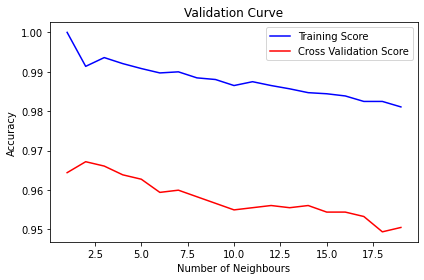

In [19]:
plt.plot(parameter_range, mean_train_score, label = "Training Score", color = 'blue')
plt.plot(parameter_range, mean_test_score, label = "Cross Validation Score", color = 'red')
plt.title("Validation Curve")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()